In [0]:
!pip install -U -q PyDrive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, utils
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
# Load Libs for Google Collab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
%matplotlib inline

In [0]:
# Authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))
X_downloaded = drive.CreateFile({'id': 'XXX',
                                'parents': 'XXX'})
X_downloaded.GetContentFile('X.csv')
y_downloaded = drive.CreateFile({'id': 'XXX',
                                'parents': 'XXX'})
y_downloaded.GetContentFile('y.csv')

In [0]:
X = pd.read_csv('X.csv', sep='\t', decimal=',', encoding='utf-8', index_col=0)
y = pd.read_csv('y.csv', sep='\t', decimal=',', encoding='utf-8', index_col=0)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=52)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors = 5)

k_range = list(range(1,7))
param_grid = dict(n_neighbors=k_range)

model = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

model.fit(X_train.as_matrix(), y_train.as_matrix().ravel().T)


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [0]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

model.grid_scores_

98.94633668218574 %
{'n_neighbors': 1}


[mean: 0.99072, std: 0.00187, params: {'n_neighbors': 1},
 mean: 0.98943, std: 0.00209, params: {'n_neighbors': 2},
 mean: 0.98873, std: 0.00242, params: {'n_neighbors': 3},
 mean: 0.98882, std: 0.00202, params: {'n_neighbors': 4},
 mean: 0.98716, std: 0.00231, params: {'n_neighbors': 5},
 mean: 0.98695, std: 0.00250, params: {'n_neighbors': 6}]

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
score = cross_val_score(knn, X_train.as_matrix(), y_train.as_matrix().ravel().T, cv=10)

             precision    recall  f1-score   support

          1       0.98      0.99      0.99       823
          2       0.99      0.99      0.99      1160
          3       1.00      1.00      1.00      1027
          4       0.99      0.98      0.98      1253
          5       0.98      0.98      0.98      1204
          6       0.99      0.99      0.99      1358
          7       0.99      0.99      0.99      1337

avg / total       0.99      0.99      0.99      8162



In [0]:
grid_mean_scores = [result.mean_validation_score for result in model.grid_scores_]
print(grid_mean_scores)

[0.9907180492586692, 0.9894314422252175, 0.9887268717068987, 0.988818772209288, 0.9871645631662787, 0.9869501286607033]


Text(0,0.5,'Cross-Validated Accuracy')

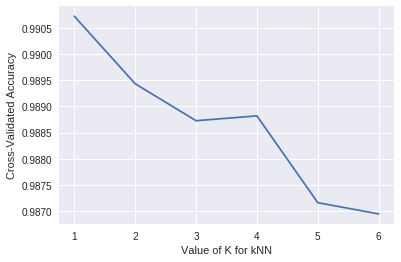

In [0]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for kNN')
plt.ylabel('Cross-Validated Accuracy')

In [0]:
print(model.best_score_)
print(model.best_params_)
print(model.best_estimator_)
print(model.score(X_test, y_test))

0.9907180492586692
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
0.9894633668218574


8162
Index(['Bike', 'Car', 'Jogging', 'Metro', 'Tram', 'Train', 'Walking'], dtype='object')


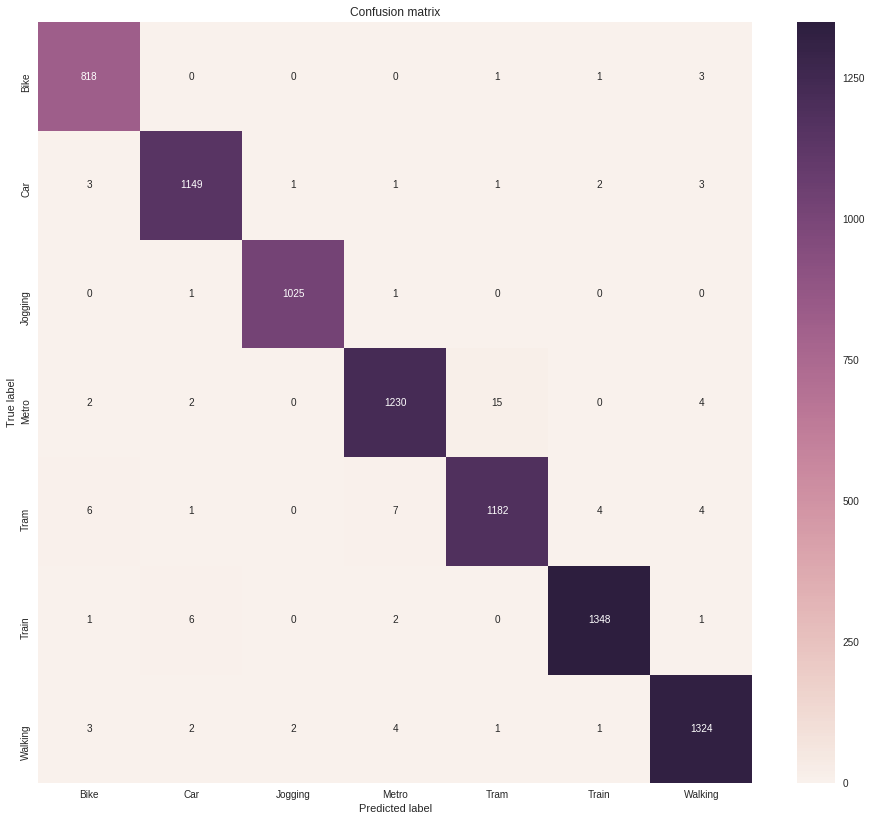

In [0]:
LABELS = ['Bike', 'Car', 'Jogging', 'Metro', 'Tram', 'Train', 'Walking', 'ALL']
labels = ['Bike', 'Car', 'Jogging', 'Metro', 'Tram', 'Train', 'Walking']

print(len(y_test.values.flatten()))

crosstab = pd.crosstab(y_test.values.flatten(), model.predict(X_test),
                      rownames=['True'], colnames=['Predicted'],
                      margins=True)
crosstab.columns = LABELS
crosstab.index = LABELS
crosstab = crosstab.drop('ALL', axis=1).drop('ALL', axis=0)

print(crosstab.columns)

plt.figure(figsize=(16, 14))
sn.heatmap(crosstab, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();


In [0]:
scores = []
for i in range(1,7):
  knn = KNeighborsClassifier(n_neighbors = i, n_jobs=-1)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


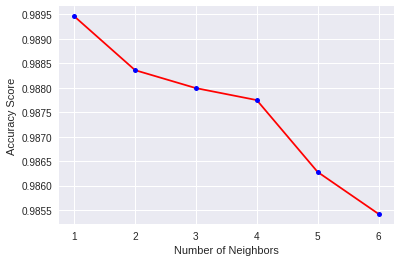

In [0]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,7)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)
plt.show()

In [0]:
scores = np.array(scores)
print("Optimal # of neighbors: ", scores.argmax()+1)
print("Accuracy score: ", scores.max()*100)

Optimal # of neighbors:  1
Accuracy score:  98.94633668218574
